In [ ]:
import random
import matplotlib.pyplot as pyplot

In [ ]:
class Product:
    def __init__(self, name, space, value):
        self.name = name
        self.space = space
        self.value = value

In [ ]:
class Individual:
    def __init__(self, list_product, space_limit, generation=0):        
        self.list_product = list_product
        self.space_limit = space_limit
        self.generation = generation
        self.score = 0
        self.used_space = 0
        self.chromosome = []

        for i in range(len(self.list_product)):
            if random.random() < 0.5:
                self.chromosome.append('0')
            else:
                self.chromosome.append('1')

    def fitness(self):
        score = 0
        sum_spaces = 0

        for i in range(len(self.chromosome)):
            if self.chromosome[i] == '1':
                score += self.list_product[i].value
                sum_spaces += self.list_product[i].space
        
        if sum_spaces > self.space_limit:
            score = 1
        
        self.score = score
        self.used_space = sum_spaces
    
    def crossover(self, other):
        cut = round(random.random() * (len(self.chromosome) - 1))
        chrom_son1 = other.chromosome[0:cut] + self.chromosome[cut:]
        chrom_son2 = self.chromosome[0:cut] + other.chromosome[cut:]

        sons = [Individual(self.list_product, self.space_limit, self.generation + 1),
                 Individual(self.list_product, self.space_limit, self.generation + 1)] 

        sons[0].chromosome = chrom_son1
        sons[1].chromosome = chrom_son2

        return sons[0], sons[1]

    def mutation(self, rate):
        for i in range(len(self.chromosome)):
            if random.random() < rate:
                self.chromosome[i] = '1' if self.chromosome[i] == '0' else '0'

In [ ]:
class GeneticAlgorithm:
    def __init__(self, size_population):
        self.size_population = size_population
        self.population = []
        self.generation = 0
        self.best_solution = None
        self.result = []
    
    def init_population(self, list_product, space_limit):
        for i in range(self.size_population):
            self.population.append(Individual(list_product, space_limit))
        self.best_solution = self.population[0]

    # Di urutkan berdasarkan total score terbesar
    def sort_population(self):
        self.population = sorted(self.population, key = lambda ind: ind.score, reverse = True)
    
    # Melakukan perhitungan fitness pada setiap populasi
    def fit_population(self):
        for ind in self.population:
            ind.fitness()
    
    # Menentukan individu terbaik dari setiap generasi
    def best_individual(self, ind):
        if ind.score > self.best_solution.score:
            self.best_solution = ind
    
    def sum_score(self):
        s = 0
        for ind in self.population:
            s += ind.score
        return s
    
    # Melakukan seleksi parent(seleksi kromosom)
    def select_parent(self, sum_score):
        parent = -1
        draw = random.random() * sum_score
        s = 0
        i = 0
        while i < len(self.population) and s < draw:
            s += self.population[i].score
            parent += 1
            i += 1
        return parent

    def new_population(self, prob_mutation):
        s = self.sum_score()
        newpopulation = []
        for i in range(0, self.size_population, 2):
            p1_i = self.select_parent(s)
            p2_i = self.select_parent(s)
            son1, son2 = self.population[p1_i].crossover(self.population[p2_i])
            son1.mutation(prob_mutation)
            son2.mutation(prob_mutation)
            newpopulation.append(son1)
            newpopulation.append(son2)
        self.population = list(newpopulation)

    def solve(self, list_products, limit, num_generations, prob_mutation):
        self.init_population(list_products, limit)
        self.fit_population()
        self.sort_population()
        self.best_individual(self.population[0])
        self.result.append(self.best_solution.score)
        for i in range(num_generations):
            self.new_population(prob_mutation)
            self.fit_population()
            self.sort_population()
            self.best_individual(self.population[0])
            self.result.append(self.best_solution.score)
            self.print_generation()
        self.print_solution()

    def get_result(self):
        return self.result

    # Output individu terbaik dari setiap populasi/kromosom
    def print_generation(self):
        best = self.population[0]
        print('Generasi: {} \n Kromosom: {} \n Total Harga: {} \n Ruang: {}'.format(best.generation, best.chromosome, best.score, best.used_space))

    # Output individu terbaik dari setiap generasi
    def print_solution(self):
        best = self.best_solution
        print()
        print('*'*33 + ' BEST INDIVIDU ' + '*'*33)
        print('Generasi: {} \n kromosom: {} \n Total Harga: {} \n Ruang: {}'.format(best.generation, best.chromosome, best.score, best.used_space))
        print('*'*28 + ' LIST PRODUK YANG DIANGKUT ' + '*'*28)
        for i, gene in enumerate(best.chromosome):
            if gene == '1':
                print(best.list_product[i].name)
    

Masukkan limit box (m2): 3
Masukkan banyak populasi: 20
Masukkan nilai probabilitas mutasi: 0.3
Masukkan banyak generasi: 50
Generasi: 1 
 Kromosom: ['0', '1', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '0', '0'] 
 Total Harga: 54141000 
 Ruang: 2.4314999999999998
Generasi: 2 
 Kromosom: ['1', '1', '0', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '1'] 
 Total Harga: 53279000 
 Ruang: 2.7056
Generasi: 3 
 Kromosom: ['0', '0', '0', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1'] 
 Total Harga: 53297000 
 Ruang: 2.7003000000000004
Generasi: 4 
 Kromosom: ['0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0'] 
 Total Harga: 53708500 
 Ruang: 2.9919
Generasi: 5 
 Kromosom: ['1', '1', '0', '1', '0', '0', '0', '0', '1', '0', '0', '1', '1', '1'] 
 Total Harga: 53309000 
 Ruang: 2.5471
Generasi: 6 
 Kromosom: ['0', '0', '1', '1', '1', '0', '0', '0', '1', '0', '0', '1', '1', '1'] 
 Total Harga: 48031500 
 Ruang: 2.6357
Generasi: 7 
 Kromosom: ['0', '0', '1', '

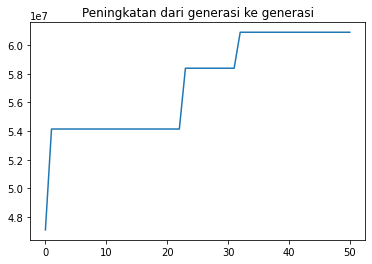

In [ ]:
if __name__ == '__main__':
    list_products = []
    list_products.append(Product('Dispenser Miyako', 0.319, 200000))
    list_products.append(Product('TV LED 55', 0.5222, 9499000))
    list_products.append(Product('Kulkas 2 Pintu', 0.8068, 3178500))
    list_products.append(Product('TV LED 50', 0.3769, 7699000))
    list_products.append(Product('Kompor Gas 3 Tungku', 0.123, 1243000))
    list_products.append(Product('Printer Epson L360', 0.375, 2210000))
    list_products.append(Product('Microwave Panasonic', 0.502, 3590000))
    list_products.append(Product('TV LED 40', 0.2574, 3489000))
    list_products.append(Product('Laptop Huawei D15', 0.305, 10000000))
    list_products.append(Product('Microwave Sharp', 0.587, 1199000))
    list_products.append(Product('Kompor Listrik', 0.112, 1365000))
    list_products.append(Product('Laptop Lenovo Legion', 0.356, 18499000))
    list_products.append(Product('Printer Canon IP2770', 0.347, 653000))
    list_products.append(Product('Laptop Asus Vivobook', 0.321, 6759000))

    ''' Input data
        Ex: limit = 3
            size_population = 200 & 20
            prob_mutation = 0.3
            num_generation = 50
    '''
    limit = float(input("Masukkan limit box (m2): "))
    size_population = int(input("Masukkan banyak populasi: "))
    prob_mutation = float(input("Masukkan nilai probabilitas mutasi: "))
    num_generations = int(input("Masukkan banyak generasi: "))

    ga = GeneticAlgorithm(size_population)
    ga.solve(list_products, limit, num_generations, prob_mutation)
    
    print('*'*28 + ' GRAFIK PENINGKATAN HARGA ' + '*'*28)
    pyplot.plot(ga.get_result())
    pyplot.title('Peningkatan dari generasi ke generasi')
    pyplot.show()